In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from statsmodels.stats.outliers_influence import variance_inflation_factor
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

## 1. Reading and Understanding the Data

In [2]:
leads = pd.read_csv('Leads.csv')

In [3]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
leads.shape

(9240, 37)

In [5]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
#Renaming the Columns
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [7]:
leads.rename(columns={'Total Time Spent on Website':'Website_Time_Spent',
       'Page Views Per Visit':'Page_Views','How did you hear about X Education':'Source', 'What is your current occupation':'Occupation',
       'What matters most to you in choosing a course':'Course_Reason','Receive More Updates About Our Courses':'Receive_Updates','Update me on Supply Chain Content':'Supply_chain_update', 'Get updates on DM Content':'DM_Content_Update',
        'I agree to pay the amount through cheque':'Cheque_Pmt',
       'A free copy of Mastering The Interview':'Free_Copy'},inplace=True)

In [8]:
leads.describe()

,Lead Number,Converted,TotalVisits,Website_Time_Spent,Page_Views,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## 2. Data Cleaning

Many of the categorical variables have a level called 'Select' .Replacing the values 'Select' to NaN

In [9]:
leads = leads.replace('Select',np.nan)
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Website_Time_Spent,Page_Views,Last Activity,Country,Specialization,Source,Occupation,Course_Reason,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive_Updates,Tags,Lead Quality,Supply_chain_update,DM_Content_Update,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,Cheque_Pmt,Free_Copy,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [10]:
# Dropping "Prospect Id" and "Lead Number" Columns
leads.drop(['Prospect ID','Lead Number','Receive_Updates','Supply_chain_update','DM_Content_Update',
           'Cheque_Pmt','Magazine','Tags'],axis=1,inplace=True)

In [11]:
# Check the percentages of missing values in each column
leads.isnull().sum()/leads.shape[0]*100

Lead Origin                     0.000000
Lead Source                     0.389610
Do Not Email                    0.000000
Do Not Call                     0.000000
Converted                       0.000000
TotalVisits                     1.482684
Website_Time_Spent              0.000000
Page_Views                      1.482684
Last Activity                   1.114719
Country                        26.634199
Specialization                 36.580087
Source                         78.463203
Occupation                     29.112554
Course_Reason                  29.318182
Search                          0.000000
Newspaper Article               0.000000
X Education Forums              0.000000
Newspaper                       0.000000
Digital Advertisement           0.000000
Through Recommendations         0.000000
Lead Quality                   51.590909
Lead Profile                   74.188312
City                           39.707792
Asymmetrique Activity Index    45.649351
Asymmetrique Pro

In [12]:
# Dropping columns with more than 45% Null Values
cols_to_drop=leads.loc[:,((leads.isnull().sum()/leads.shape[0]*100) > 45)].columns

In [13]:
leads.drop(cols_to_drop,axis=1,inplace=True)
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Website_Time_Spent,Page_Views,Last Activity,Country,Specialization,Occupation,Course_Reason,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,City,Free_Copy,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,NaN,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,NaN,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,Mumbai,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Mumbai,No,Modified


In [14]:
# Rechecking the Columns with NULL Values
leads.isnull().sum()/leads.shape[0]*100

Lead Origin                 0.000000
Lead Source                 0.389610
Do Not Email                0.000000
Do Not Call                 0.000000
Converted                   0.000000
TotalVisits                 1.482684
Website_Time_Spent          0.000000
Page_Views                  1.482684
Last Activity               1.114719
Country                    26.634199
Specialization             36.580087
Occupation                 29.112554
Course_Reason              29.318182
Search                      0.000000
Newspaper Article           0.000000
X Education Forums          0.000000
Newspaper                   0.000000
Digital Advertisement       0.000000
Through Recommendations     0.000000
City                       39.707792
Free_Copy                   0.000000
Last Notable Activity       0.000000
dtype: float64

In [15]:
leads.shape

(9240, 22)

### Handling missing Values    

In [16]:
leads['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
welearnblog_Home        1
Pay per Click Ads       1
testone                 1
blog                    1
NC_EDM                  1
WeLearn                 1
youtubechannel          1
Name: Lead Source, dtype: int64

**Observation**
1. Google is highest number of Lead Source and the Null Counts for the column is neglible as compared to the database
2. Same Category is repeted twice due to case mismatch such as 'Google' and 'google'

In [17]:
# Treating the values 'google' and 'Google' as same.
#Combining lower frequency values and NaN values to new category called Others.
leads['Lead Source'] = leads['Lead Source'].replace('google','Google')
leads['Lead Source'] = leads['Lead Source'].replace([np.nan,'bing','Click2call','Social Media','Live Chat','Press_Release',
                                                     'NC_EDM','welearnblog_Home','youtubechannel','Pay per Click Ads',
                                                     'blog','testone','WeLearn'],'Others')

In [18]:
leads['Lead Source'].value_counts()

Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Others                59
Facebook              55
Name: Lead Source, dtype: int64

In [19]:
leads.isnull().mean()*100

Lead Origin                 0.000000
Lead Source                 0.000000
Do Not Email                0.000000
Do Not Call                 0.000000
Converted                   0.000000
TotalVisits                 1.482684
Website_Time_Spent          0.000000
Page_Views                  1.482684
Last Activity               1.114719
Country                    26.634199
Specialization             36.580087
Occupation                 29.112554
Course_Reason              29.318182
Search                      0.000000
Newspaper Article           0.000000
X Education Forums          0.000000
Newspaper                   0.000000
Digital Advertisement       0.000000
Through Recommendations     0.000000
City                       39.707792
Free_Copy                   0.000000
Last Notable Activity       0.000000
dtype: float64

In [20]:
leads['TotalVisits'].isnull().sum()

137

In [21]:
leads['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
23.0        6
21.0        6
27.0        5
24.0        5
25.0        5
22.0        3
28.0        2
29.0        2
26.0        2
251.0       1
74.0        1
30.0        1
141.0       1
54.0        1
41.0        1
115.0       1
43.0        1
42.0        1
32.0        1
55.0        1
Name: TotalVisits, dtype: int64

In [22]:
# As 0.0 is highest number of TotalVisits and the Null Counts for the column is negligible as compared to the dataset, 
# hence we can impute the missing Values with 0.0
leads['TotalVisits'].fillna(0.0,inplace=True)

In [23]:
leads['Page_Views'].value_counts()

0.00     2189
2.00     1795
3.00     1196
4.00      896
1.00      651
5.00      517
1.50      306
6.00      244
2.50      241
7.00      133
3.50       94
8.00       86
1.33       66
1.67       60
2.33       59
2.67       54
9.00       45
4.50       43
1.75       28
3.33       27
10.00      25
1.25       23
5.50       21
2.25       19
11.00      18
3.67       16
6.50       13
1.80       13
2.75       12
1.40       11
2.20        9
14.00       9
4.33        9
2.80        9
3.25        8
1.60        8
2.17        8
2.40        6
13.00       6
1.20        5
12.00       5
2.60        4
15.00       4
1.83        4
1.71        4
1.43        4
3.40        4
5.67        3
1.38        3
1.78        3
1.57        3
16.00       3
4.25        3
4.75        3
2.09        2
3.75        2
2.22        2
1.22        2
2.83        2
5.33        2
1.56        2
1.14        2
2.71        2
5.40        2
7.50        2
5.25        2
3.20        2
3.60        2
1.23        2
3.57        1
4.17        1
1.63  

In [24]:
# As 0.00 is highest number of Page_Views and the Null Counts for the column is negligible as compared to the dataset, 
# hence we can impute the missing Values with 0.00
leads['Page_Views'].fillna(0.00,inplace=True)

In [25]:
leads['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [26]:
# As ""Email Opened"" is highest number of Page_Views and the Null Counts for the column is negligible as compared to the dataset, 
# Combine NaN and Low Frequency Values to Others
leads['Last Activity'] = leads['Last Activity'].replace([np.nan,'Unreachable','Unsubscribed','Had a Phone Conversation',
                                                        'Approached upfront','View in browser link Clicked',
                                                        'Email Marked Spam','Email Received','Resubscribed to emails',
                                                        'Visited Booth in Tradeshow'],'Others')

In [27]:
leads['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
Canada                     4
Nigeria                    4
South Africa               4
Germany                    4
Kuwait                     4
Sweden                     3
Uganda                     2
Bangladesh                 2
Asia/Pacific Region        2
China                      2
Ghana                      2
Italy                      2
Belgium                    2
Philippines                2
Netherlands                2
Vietnam                    1
Denmark                    1
Tanzania                   1
Switzerland                1
Sri Lanka                  1
Malaysia      

As seen above lead conversion is way higher for customers based out of'India'. Hence, we can impute the missing values with 'India'. But then, this column will become a skewed column and must be dropped from the dataset.

In [28]:
# Dropping Column Country
leads.drop(['Country'],axis=1, inplace=True)

In [29]:
leads['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

Most of the values are missing for the Speialization columns. We will convert it to Others.

In [30]:
#Replacing the NaN values with 'Others'
leads['Specialization'] = leads['Specialization'].replace(np.nan,'Others')

In [31]:
leads.isnull().mean()*100

Lead Origin                 0.000000
Lead Source                 0.000000
Do Not Email                0.000000
Do Not Call                 0.000000
Converted                   0.000000
TotalVisits                 0.000000
Website_Time_Spent          0.000000
Page_Views                  0.000000
Last Activity               0.000000
Specialization              0.000000
Occupation                 29.112554
Course_Reason              29.318182
Search                      0.000000
Newspaper Article           0.000000
X Education Forums          0.000000
Newspaper                   0.000000
Digital Advertisement       0.000000
Through Recommendations     0.000000
City                       39.707792
Free_Copy                   0.000000
Last Notable Activity       0.000000
dtype: float64

In [32]:
leads['Occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: Occupation, dtype: int64

In [33]:
# Since Únemployed is highest count, we will impute the missing values with Unemployed
leads['Occupation'].fillna('Unemployed',inplace=True)

In [34]:
leads.isnull().mean()*100

Lead Origin                 0.000000
Lead Source                 0.000000
Do Not Email                0.000000
Do Not Call                 0.000000
Converted                   0.000000
TotalVisits                 0.000000
Website_Time_Spent          0.000000
Page_Views                  0.000000
Last Activity               0.000000
Specialization              0.000000
Occupation                  0.000000
Course_Reason              29.318182
Search                      0.000000
Newspaper Article           0.000000
X Education Forums          0.000000
Newspaper                   0.000000
Digital Advertisement       0.000000
Through Recommendations     0.000000
City                       39.707792
Free_Copy                   0.000000
Last Notable Activity       0.000000
dtype: float64

In [35]:
leads['Course_Reason'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: Course_Reason, dtype: int64

Since 'Better Career Prospects' has highest count, we can impute the missing values with 'Better Career Prospects'. But then,if we replace the NaN values with 'Better Career Prospects', the column will become skewed. Hence it is better to  drop the column itself from the dataset

In [36]:
leads.drop(['Course_Reason'],axis=1, inplace=True)

In [37]:
leads.isnull().mean()*100

Lead Origin                 0.000000
Lead Source                 0.000000
Do Not Email                0.000000
Do Not Call                 0.000000
Converted                   0.000000
TotalVisits                 0.000000
Website_Time_Spent          0.000000
Page_Views                  0.000000
Last Activity               0.000000
Specialization              0.000000
Occupation                  0.000000
Search                      0.000000
Newspaper Article           0.000000
X Education Forums          0.000000
Newspaper                   0.000000
Digital Advertisement       0.000000
Through Recommendations     0.000000
City                       39.707792
Free_Copy                   0.000000
Last Notable Activity       0.000000
dtype: float64

In [38]:
leads['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

'Mumbai' has the highest frequency. Imputing the missing values as 'Mumbai'.

In [39]:
leads['City'] = leads['City'].replace(np.nan, 'Mumbai')

In [40]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Lead Origin              9240 non-null   object 
 1   Lead Source              9240 non-null   object 
 2   Do Not Email             9240 non-null   object 
 3   Do Not Call              9240 non-null   object 
 4   Converted                9240 non-null   int64  
 5   TotalVisits              9240 non-null   float64
 6   Website_Time_Spent       9240 non-null   int64  
 7   Page_Views               9240 non-null   float64
 8   Last Activity            9240 non-null   object 
 9   Specialization           9240 non-null   object 
 10  Occupation               9240 non-null   object 
 11  Search                   9240 non-null   object 
 12  Newspaper Article        9240 non-null   object 
 13  X Education Forums       9240 non-null   object 
 14  Newspaper               

### Checking and Handling Skewed Categorical Columns

In [41]:
leads['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [42]:
leads['Lead Source'].value_counts(dropna=False)

Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Others                59
Facebook              55
Name: Lead Source, dtype: int64

In [43]:
leads['Do Not Email'].value_counts()

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [44]:
leads['Do Not Call'].value_counts()

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [45]:
leads['Search'].value_counts()

No     9226
Yes      14
Name: Search, dtype: int64

In [46]:
leads['Newspaper Article'].value_counts()

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [47]:
leads['X Education Forums'].value_counts()

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [48]:
leads['Newspaper'].value_counts()

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [49]:
leads['Digital Advertisement'].value_counts()

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [50]:
leads['Through Recommendations'].value_counts()

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [51]:
leads['Free_Copy'].value_counts()

No     6352
Yes    2888
Name: Free_Copy, dtype: int64

As shown above, there are many skewed columns, having almost more than 90% same values. These skewed columns need to be dropped as it will not add much information to our model.

In [52]:
leads.drop(['Do Not Call','Search','Newspaper Article','X Education Forums', 'Newspaper', 'Digital Advertisement',
                'Through Recommendations'],axis=1, inplace=True)

In [53]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Lead Origin            9240 non-null   object 
 1   Lead Source            9240 non-null   object 
 2   Do Not Email           9240 non-null   object 
 3   Converted              9240 non-null   int64  
 4   TotalVisits            9240 non-null   float64
 5   Website_Time_Spent     9240 non-null   int64  
 6   Page_Views             9240 non-null   float64
 7   Last Activity          9240 non-null   object 
 8   Specialization         9240 non-null   object 
 9   Occupation             9240 non-null   object 
 10  City                   9240 non-null   object 
 11  Free_Copy              9240 non-null   object 
 12  Last Notable Activity  9240 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 938.6+ KB


In [54]:
leads['Last Activity'].value_counts(dropna=False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [55]:
# Combine NaN and Low Frequency Values to Others
leads['Last Activity'] = leads['Last Activity'].replace([np.nan,'Unreachable','Unsubscribed','Had a Phone Conversation',
                                                        'Approached upfront','View in browser link Clicked',
                                                        'Email Marked Spam','Email Received','Resubscribed to emails',
                                                        'Visited Booth in Tradeshow'],'Others')

In [56]:
leads['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
Form Submitted on Website          1
View in browser link Clicked       1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [57]:
# Combine lower frequency values to 'Others'
leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(['Email Bounced','Unsubscribed','Unreachable',
                                                                         'Had a Phone Conversation','Email Marked Spam',
                                                                         'Approached upfront','Email Received',
                                                                         'Resubscribed to emails',
                                                                         'View in browser link Clicked',
                                                                         'Form Submitted on Website'],'Others')

In [58]:
leads['Last Notable Activity'].value_counts()

Modified                   3407
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Others                      160
Name: Last Notable Activity, dtype: int64

In [59]:
leads.isnull().mean()*100

Lead Origin              0.0
Lead Source              0.0
Do Not Email             0.0
Converted                0.0
TotalVisits              0.0
Website_Time_Spent       0.0
Page_Views               0.0
Last Activity            0.0
Specialization           0.0
Occupation               0.0
City                     0.0
Free_Copy                0.0
Last Notable Activity    0.0
dtype: float64

In [60]:
leads.shape

(9240, 13)

### Handle Outliers in Numerical Columns

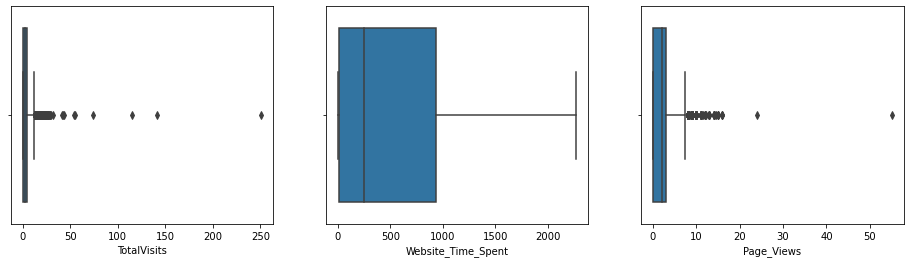

In [61]:
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
sns.boxplot(leads['TotalVisits'])
plt.subplot(1,3,2)
sns.boxplot(leads['Website_Time_Spent'])
plt.subplot(1,3,3)
sns.boxplot(leads['Page_Views'])
plt.show()

#### TotalVisits and Page_Views have outliers on the higher sides.Lets cap them.

In [62]:
leads['TotalVisits'].quantile([0.01,.25, .5, .75, .90, .95, .99, 1])

0.01      0.0
0.25      0.0
0.50      3.0
0.75      5.0
0.90      7.0
0.95     10.0
0.99     17.0
1.00    251.0
Name: TotalVisits, dtype: float64

In [63]:
q3 = leads.TotalVisits.quantile(0.99)
leads = leads[leads.TotalVisits <= q3]

In [64]:
leads['TotalVisits'].quantile([0.01,.25, .5, .75, .90, .95, .99, 1])

0.01     0.0
0.25     0.0
0.50     3.0
0.75     5.0
0.90     7.0
0.95     9.0
0.99    13.0
1.00    17.0
Name: TotalVisits, dtype: float64

In [65]:
#After Capping outliers

leads['Page_Views'].quantile([0.05,.25, .5, .75, .90, .95, .99, 1])

0.05     0.0
0.25     0.0
0.50     2.0
0.75     3.0
0.90     5.0
0.95     6.0
0.99     9.0
1.00    16.0
Name: Page_Views, dtype: float64

In [66]:
q3 = leads['Page_Views'].quantile(0.99)
leads = leads[leads['Page_Views'] <= q3]

In [67]:
#After Capping outliers

leads['Page_Views'].quantile([0.05,.25, .5, .75, .90, .95, .99, 1])

0.05    0.0
0.25    0.0
0.50    2.0
0.75    3.0
0.90    5.0
0.95    6.0
0.99    8.0
1.00    9.0
Name: Page_Views, dtype: float64

#### Final Dataset

In [68]:
leads.shape

(9090, 13)

## 3. Exploratory Data Analysis

### Univariate Analysis of Categorical Variables.

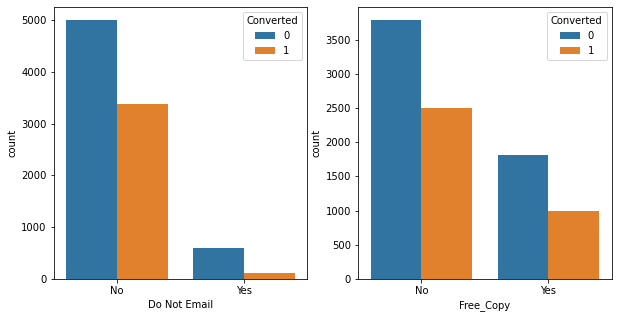

In [69]:
#Binary Categorical Variables
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(leads['Do Not Email'],hue = leads.Converted)

plt.subplot(1,2,2)
sns.countplot(leads['Free_Copy'],hue= leads.Converted)
plt.show()

1. Most of the leads do not want to be emailed about the course and also do not want the free copy of mastering the interview.
2. Those leads who do not want to be emailed have high chances of getting converted.

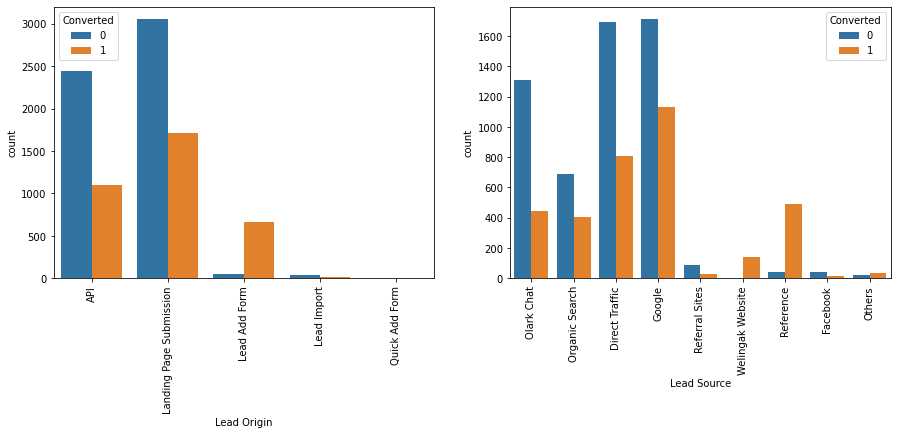

In [70]:
# Analysis on lead Origin and Source.
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(leads['Lead Origin'],hue = leads.Converted)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(leads['Lead Source'],hue = leads.Converted)
plt.xticks(rotation=90)
plt.show()

Inferences from Lead Origin - 
1. API and Landing Page Submission bring higher number of leads as well as conversion.
2. Lead Add Form has a very high conversion rate but count of leads are not very high.
3. In order to improve overall lead conversion rate, we need to improve lead converion of API and Landing Page Submission   origin and generate more leads from Lead Add Form.


Inferences from Lead Source - 
1. Reference and Welingak Website have very high conversion rate but count of leads are not very high.
2. Google, Direct Traffic and Olark Chat bring higher number of leads as well as conversion.

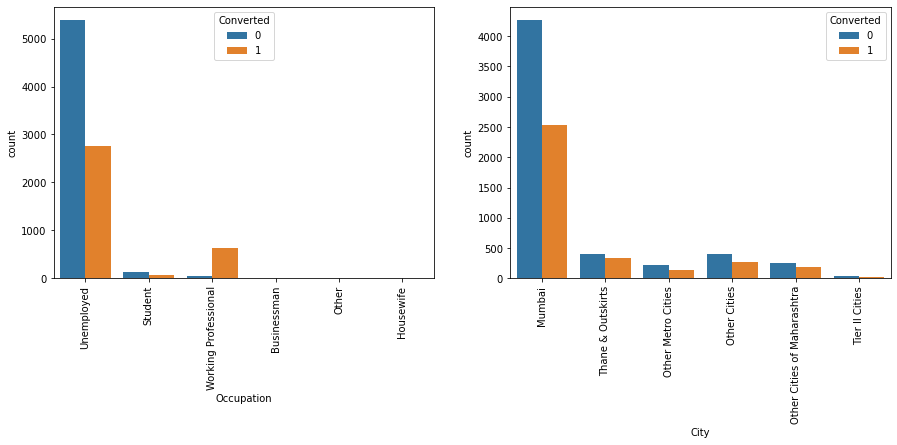

In [71]:
# Analysis on City and Occupation
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(leads['Occupation'],hue = leads.Converted)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(leads['City'],hue = leads.Converted)
plt.xticks(rotation=90)
plt.show()

Inferences from 'Occupation': 
1. Working professional checking about the course have high chances of joining the course.
2. Higher number of leads as well as conversion from Unemployed category.

Inferences from 'City' :
1. Mumbai has the highest number of leads as well as conversion.

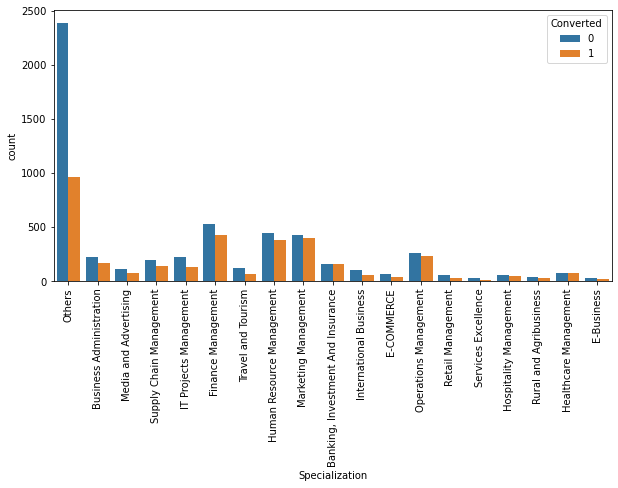

In [72]:
# Analysis on Specialization
plt.figure(figsize=(10,5))
sns.countplot(leads.Specialization,hue=leads.Converted)
plt.xticks(rotation = 90)
plt.show()

Inferences from 'Specialization' - 
1. Highest number of leads as well as conversion fall in 'Others' category. However, this category is the bucket of 'Not Specified' Values.
2. Finance Management, Human Resource Management, Marketing Management, Operations Management are showing reasonably good results in terms of count of leads as well as conversion.

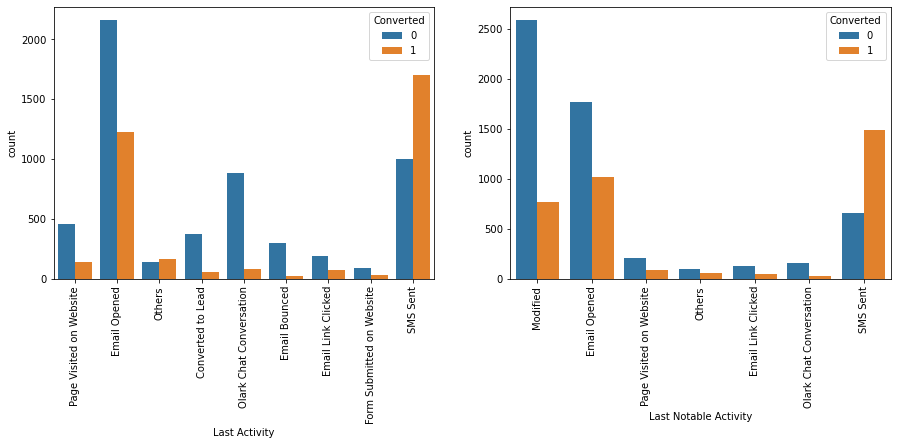

In [73]:
# Analysis on 'last Activity' and Last Notable Activity
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(leads['Last Activity'],hue = leads.Converted)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(leads['Last Notable Activity'],hue = leads.Converted)
plt.xticks(rotation=90)
plt.show()

Inferences from 'Last Activity' -
1. Although the count is high for 'Email Opened', but the highest conversion rate from 'SMS Sent' Category.

Inferences from 'Last Notable Activity' -
1. High Conversion rate is for 'Email Opened' and 'SMS Sent' Category.
2. Lead count is highest for 'Modified' and 'Email Opened' category.

### Bivariate Analysis on Numerical Columns


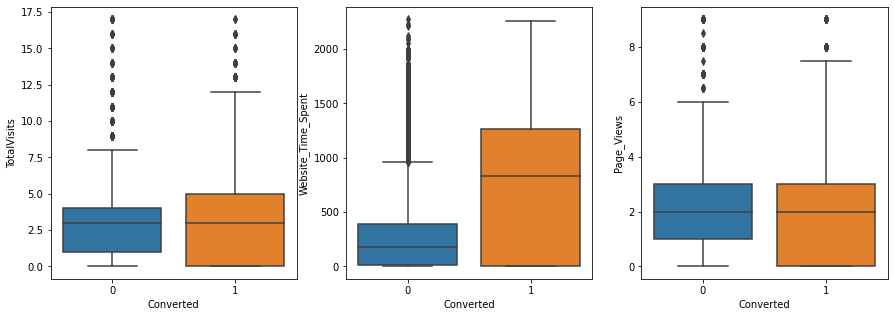

In [74]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(x = 'Converted', y = 'TotalVisits', data=leads)

plt.subplot(1,3,2)
sns.boxplot(x = 'Converted', y = 'Website_Time_Spent', data=leads)

plt.subplot(1,3,3)
sns.boxplot(x = 'Converted', y = 'Page_Views', data=leads)
plt.show()

Inferences
1. Leads spending more time on the website are more likely to be converted.

## 4. Data Preparation

### Converting yes/no variables to binary 1/0

In [75]:
# List of variables to map
varlist =  ['Do Not Email', 'Free_Copy']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the variable list
leads[varlist] = leads[varlist].apply(binary_map)

In [76]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Website_Time_Spent,Page_Views,Last Activity,Specialization,Occupation,City,Free_Copy,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Mumbai,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,Mumbai,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Mumbai,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Mumbai,0,Modified


In [77]:
leads.shape

(9090, 13)

### Dummy Variable Creation

In [78]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(leads[['Lead Origin', 'Occupation', 'City']], drop_first=True)

# Adding the results to the master dataframe
leads = pd.concat([leads, dummy], axis=1)



# Creating dummy variables for 'Lead Source'
lo = pd.get_dummies(leads['Lead Source'],prefix='Lead Source')
lo = lo.drop(['Lead Source_Others'],1)
# Adding the results to the master dataframe
leads = pd.concat([leads, lo], axis=1)

# Creating dummy variables for 'Last Activity'
la = pd.get_dummies(leads['Last Activity'],prefix='Last Activity')
la = la.drop(['Last Activity_Others'],1)
# Adding the results to the master dataframe
leads = pd.concat([leads, la], axis=1)

# Creating dummy variables for 'Specialization'
spl = pd.get_dummies(leads['Specialization'],prefix='Specialization')
spl = spl.drop(['Specialization_Others'],1)
# Adding the results to the master dataframe
leads = pd.concat([leads, spl], axis=1)

# Creating dummy variables for 'Last Notable Activity'
lna = pd.get_dummies(leads['Last Notable Activity'],prefix='Last Notable Activity')
lna = lna.drop(['Last Notable Activity_Others'],1)
# Adding the results to the master dataframe
leads = pd.concat([leads, lna], axis=1)


In [79]:
# Dropping Repeat Variables
leads = leads.drop(['Lead Origin', 'Occupation', 'City', 'Lead Source', 'Last Activity', 'Specialization',
                    'Last Notable Activity'],1)

In [80]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9090 entries, 0 to 9239
Data columns (total 60 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Do Not Email                                      9090 non-null   int64  
 1   Converted                                         9090 non-null   int64  
 2   TotalVisits                                       9090 non-null   float64
 3   Website_Time_Spent                                9090 non-null   int64  
 4   Page_Views                                        9090 non-null   float64
 5   Free_Copy                                         9090 non-null   int64  
 6   Lead Origin_Landing Page Submission               9090 non-null   uint8  
 7   Lead Origin_Lead Add Form                         9090 non-null   uint8  
 8   Lead Origin_Lead Import                           9090 non-null   uint8  
 9   Lead Origin_Quick A

In [81]:
leads.head()

,Do Not Email,Converted,TotalVisits,Website_Time_Spent,Page_Views,Free_Copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


### Splitting Data into Train and Test Set

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
# Feature variable to X
X = leads.drop('Converted',axis=1)

# Response variable to y
y = leads['Converted']

In [84]:
X.head()

,Do Not Email,TotalVisits,Website_Time_Spent,Page_Views,Free_Copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [85]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Checing Correlation among Variables

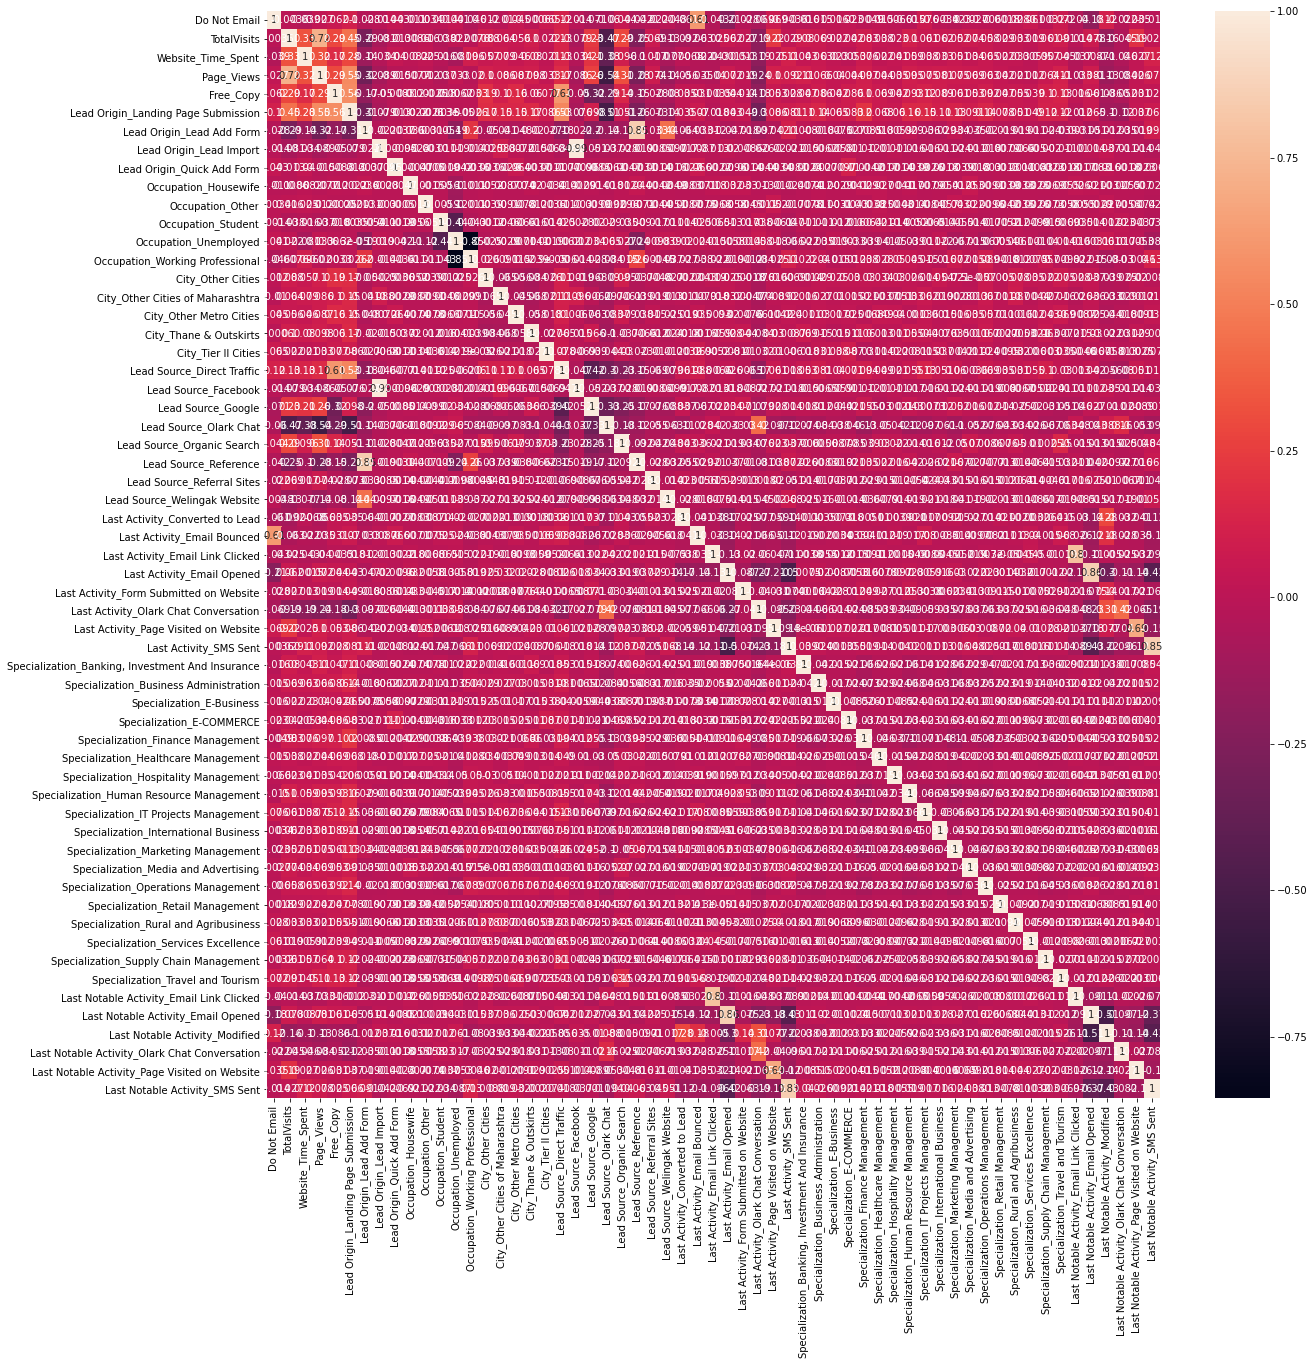

In [86]:

plt.figure(figsize=(20,20))
sns.heatmap(X_train.corr(),annot=True)
plt.show()

### Scaling

In [87]:
from sklearn.preprocessing import StandardScaler

In [88]:
scaler = StandardScaler()
num_cols = ['TotalVisits','Website_Time_Spent','Page_Views']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_train.head()

,Do Not Email,TotalVisits,Website_Time_Spent,Page_Views,Free_Copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
302,0,1.340545,-0.428736,0.059262,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6087,1,-1.070195,-0.887355,-1.178546,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1033,0,0.651762,-0.025151,1.477695,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7656,1,0.996153,-0.241619,2.008943,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3241,0,0.307371,0.897591,-0.471986,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


## 5. Modelling

In [89]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

### RFE

In [90]:
# Running RFE with 15 variables as output
from sklearn.feature_selection import RFE
rfe = RFE(logreg,15)
rfe = rfe.fit(X_train,y_train)

In [91]:
rfe.support_

array([ True, False,  True, False, False, False,  True, False, False,
        True, False,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True,  True,  True, False])

In [92]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 38),
 ('Website_Time_Spent', True, 1),
 ('Page_Views', False, 39),
 ('Free_Copy', False, 41),
 ('Lead Origin_Landing Page Submission', False, 20),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 40),
 ('Lead Origin_Quick Add Form', False, 37),
 ('Occupation_Housewife', True, 1),
 ('Occupation_Other', False, 42),
 ('Occupation_Student', True, 1),
 ('Occupation_Unemployed', True, 1),
 ('Occupation_Working Professional', True, 1),
 ('City_Other Cities', False, 30),
 ('City_Other Cities of Maharashtra', False, 35),
 ('City_Other Metro Cities', False, 44),
 ('City_Thane & Outskirts', False, 29),
 ('City_Tier II Cities', False, 28),
 ('Lead Source_Direct Traffic', False, 2),
 ('Lead Source_Facebook', False, 6),
 ('Lead Source_Google', False, 5),
 ('Lead Source_Olark Chat', False, 31),
 ('Lead Source_Organic Search', False, 3),
 ('Lead Source_Reference', False, 36),
 ('Lead Source_Referral Sites', False, 4),
 ('L

In [93]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Website_Time_Spent', 'Lead Origin_Lead Add Form',
       'Occupation_Housewife', 'Occupation_Student', 'Occupation_Unemployed',
       'Occupation_Working Professional', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

### Model 1

In [94]:
# We will use stats model for it.
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6347
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2695.0
Date:                Mon, 09 Aug 2021   Deviance:                       5389.9
Time:                        20:53:22   Pearson chi2:                 6.57e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             1.5976      0.597      2.677      0.007       0.428       2.767
Do Not Email                                     -1.4682      0.187     -7.834      0.000      -1.836      -1.101
Website_Time_Spent                                0.9217      0.035     26.363      0.000       0.853       0.990
Lead Origin_Lead Add Form                         3.4218      0.194     17.631      0.000       3.041       3.802
Occupation_Housewife                             21.6857   1.44e+04      0.002      0.999   -2.81e+04    2.82e+04
Occupation_Student                               -0.8782      0.634     -1.386      0.166      -2.121       0.364
Occupation_Unemployed                            -1.2014      0.593     -2.027      0.043      -2.363      -0.039
Occupation_Working Professional                   1.5236      0.619      2.461      0.014       0.310       2.737
Lead Source_Welingak Website                      2.9106      1.029      2.829      0.005       0.894       4.927
Last Activity_Email Bounced                      -1.1186      0.371     -3.016      0.003      -1.846      -0.392
Last Activity_Olark Chat Conversation            -0.6772      0.185     -3.669      0.000      -1.039      -0.315
Last Notable Activity_Email Link Clicked         -1.8584      0.265     -7.015      0.000      -2.378      -1.339
Last Notable Activity_Email Opened               -1.4377      0.088    -16.416      0.000      -1.609      -1.266
Last Notable Activity_Modified                   -1.9286      0.095    -20.198      0.000      -2.116      -1.741
Last Notable Activity_Olark Chat Conversation    -1.8380      0.363     -5.064      0.000      -2.549      -1.127
Last Notable Activity_Page Visited on Website    -1.7712      0.197     -8.979      0.000      -2.158      -1.385
=================================================================================================================
"""

### VIF Calculation

In [95]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Occupation_Unemployed,4.18
12,Last Notable Activity_Modified,2.89
11,Last Notable Activity_Email Opened,2.30
0,Do Not Email,1.80
9,Last Activity_Olark Chat Conversation,1.74
8,Last Activity_Email Bounced,1.72
2,Lead Origin_Lead Add Form,1.49
13,Last Notable Activity_Olark Chat Conversation,1.41
6,Occupation_Working Professional,1.29
7,Lead Source_Welingak Website,1.29


In [96]:
# Dropping 'Occupation_Housewife' for it high P value
col = col.drop('Occupation_Housewife',1)

### Model 2

In [97]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6348
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2697.5
Date:                Mon, 09 Aug 2021   Deviance:                       5395.0
Time:                        20:53:23   Pearson chi2:                 6.58e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             2.2000      0.526      4.183      0.000       1.169       3.231
Do Not Email                                     -1.4727      0.188     -7.848      0.000      -1.841      -1.105
Website_Time_Spent                                0.9212      0.035     26.359      0.000       0.853       0.990
Lead Origin_Lead Add Form                         3.4236      0.194     17.647      0.000       3.043       3.804
Occupation_Student                               -1.4804      0.568     -2.608      0.009      -2.593      -0.368
Occupation_Unemployed                            -1.8034      0.522     -3.458      0.001      -2.826      -0.781
Occupation_Working Professional                   0.9216      0.551      1.672      0.094      -0.158       2.002
Lead Source_Welingak Website                      2.9092      1.029      2.827      0.005       0.893       4.926
Last Activity_Email Bounced                      -1.1144      0.371     -3.004      0.003      -1.842      -0.387
Last Activity_Olark Chat Conversation            -0.6809      0.185     -3.684      0.000      -1.043      -0.319
Last Notable Activity_Email Link Clicked         -1.8556      0.264     -7.018      0.000      -2.374      -1.337
Last Notable Activity_Email Opened               -1.4368      0.088    -16.410      0.000      -1.608      -1.265
Last Notable Activity_Modified                   -1.9295      0.095    -20.212      0.000      -2.117      -1.742
Last Notable Activity_Olark Chat Conversation    -1.8345      0.363     -5.052      0.000      -2.546      -1.123
Last Notable Activity_Page Visited on Website    -1.7760      0.197     -9.002      0.000      -2.163      -1.389
=================================================================================================================
"""

### VIF Calculation

In [98]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Occupation_Unemployed,4.15
11,Last Notable Activity_Modified,2.88
10,Last Notable Activity_Email Opened,2.28
0,Do Not Email,1.80
8,Last Activity_Olark Chat Conversation,1.74
7,Last Activity_Email Bounced,1.72
2,Lead Origin_Lead Add Form,1.49
12,Last Notable Activity_Olark Chat Conversation,1.41
5,Occupation_Working Professional,1.29
6,Lead Source_Welingak Website,1.29


Variable 'Occupation_Unemployed' has high VIF, So we can drop it

In [99]:
# Dropping 'Occupation_Unemployed'
col = col.drop('Occupation_Unemployed',1)

### Model 3

In [100]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6349
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2704.2
Date:                Mon, 09 Aug 2021   Deviance:                       5408.4
Time:                        20:53:23   Pearson chi2:                 6.60e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.3958      0.066      5.962      0.000       0.266       0.526
Do Not Email                                     -1.4629      0.187     -7.812      0.000      -1.830      -1.096
Website_Time_Spent                                0.9236      0.035     26.447      0.000       0.855       0.992
Lead Origin_Lead Add Form                         3.4454      0.194     17.784      0.000       3.066       3.825
Occupation_Student                                0.3125      0.230      1.358      0.175      -0.139       0.764
Occupation_Working Professional                   2.7146      0.186     14.609      0.000       2.350       3.079
Lead Source_Welingak Website                      2.8770      1.029      2.797      0.005       0.861       4.893
Last Activity_Email Bounced                      -1.1337      0.371     -3.055      0.002      -1.861      -0.406
Last Activity_Olark Chat Conversation            -0.6835      0.184     -3.710      0.000      -1.045      -0.322
Last Notable Activity_Email Link Clicked         -1.8436      0.263     -7.009      0.000      -2.359      -1.328
Last Notable Activity_Email Opened               -1.4265      0.087    -16.310      0.000      -1.598      -1.255
Last Notable Activity_Modified                   -1.9130      0.095    -20.092      0.000      -2.100      -1.726
Last Notable Activity_Olark Chat Conversation    -1.8313      0.363     -5.046      0.000      -2.543      -1.120
Last Notable Activity_Page Visited on Website    -1.7651      0.197     -8.942      0.000      -2.152      -1.378
=================================================================================================================
"""

### VIF Calculation

In [101]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Last Activity_Olark Chat Conversation,1.73
0,Do Not Email,1.72
6,Last Activity_Email Bounced,1.72
10,Last Notable Activity_Modified,1.52
2,Lead Origin_Lead Add Form,1.46
11,Last Notable Activity_Olark Chat Conversation,1.33
5,Lead Source_Welingak Website,1.29
4,Occupation_Working Professional,1.14
1,Website_Time_Spent,1.08
9,Last Notable Activity_Email Opened,1.04


Dropping variable 'Occupation_Student' for high P value

In [102]:
col = col.drop('Occupation_Student',1)

### Model 4

In [103]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6350
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2705.1
Date:                Mon, 09 Aug 2021   Deviance:                       5410.2
Time:                        20:53:24   Pearson chi2:                 6.60e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.4001      0.066      6.036      0.000       0.270       0.530
Do Not Email                                     -1.4681      0.187     -7.836      0.000      -1.835      -1.101
Website_Time_Spent                                0.9234      0.035     26.445      0.000       0.855       0.992
Lead Origin_Lead Add Form                         3.4510      0.194     17.822      0.000       3.071       3.831
Occupation_Working Professional                   2.7071      0.186     14.577      0.000       2.343       3.071
Lead Source_Welingak Website                      2.8659      1.029      2.786      0.005       0.850       4.882
Last Activity_Email Bounced                      -1.1196      0.372     -3.013      0.003      -1.848      -0.391
Last Activity_Olark Chat Conversation            -0.6788      0.184     -3.686      0.000      -1.040      -0.318
Last Notable Activity_Email Link Clicked         -1.8403      0.263     -6.991      0.000      -2.356      -1.324
Last Notable Activity_Email Opened               -1.4223      0.087    -16.281      0.000      -1.594      -1.251
Last Notable Activity_Modified                   -1.9108      0.095    -20.079      0.000      -2.097      -1.724
Last Notable Activity_Olark Chat Conversation    -1.8234      0.363     -5.029      0.000      -2.534      -1.113
Last Notable Activity_Page Visited on Website    -1.7627      0.197     -8.932      0.000      -2.149      -1.376
=================================================================================================================
"""

### VIF Calculation

In [104]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Last Activity_Olark Chat Conversation,1.73
0,Do Not Email,1.72
5,Last Activity_Email Bounced,1.71
9,Last Notable Activity_Modified,1.52
2,Lead Origin_Lead Add Form,1.46
10,Last Notable Activity_Olark Chat Conversation,1.33
4,Lead Source_Welingak Website,1.29
3,Occupation_Working Professional,1.14
1,Website_Time_Spent,1.08
8,Last Notable Activity_Email Opened,1.03


In [105]:
# Dropping Lead Source_Welingak Website for it high p value
col = col.drop('Lead Source_Welingak Website',1)

### Model 5

In [106]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6351
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2714.5
Date:                Mon, 09 Aug 2021   Deviance:                       5428.9
Time:                        20:53:25   Pearson chi2:                 6.93e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.3993      0.066      6.032      0.000       0.270       0.529
Do Not Email                                     -1.4411      0.186     -7.767      0.000      -1.805      -1.077
Website_Time_Spent                                0.9222      0.035     26.413      0.000       0.854       0.991
Lead Origin_Lead Add Form                         3.8048      0.187     20.301      0.000       3.437       4.172
Occupation_Working Professional                   2.6938      0.186     14.477      0.000       2.329       3.059
Last Activity_Email Bounced                      -1.1423      0.370     -3.087      0.002      -1.868      -0.417
Last Activity_Olark Chat Conversation            -0.6811      0.184     -3.697      0.000      -1.042      -0.320
Last Notable Activity_Email Link Clicked         -1.8556      0.265     -7.007      0.000      -2.375      -1.337
Last Notable Activity_Email Opened               -1.4204      0.087    -16.280      0.000      -1.591      -1.249
Last Notable Activity_Modified                   -1.9099      0.095    -20.112      0.000      -2.096      -1.724
Last Notable Activity_Olark Chat Conversation    -1.8219      0.363     -5.021      0.000      -2.533      -1.111
Last Notable Activity_Page Visited on Website    -1.7638      0.197     -8.938      0.000      -2.151      -1.377
=================================================================================================================
"""

In [107]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Last Activity_Olark Chat Conversation,1.73
0,Do Not Email,1.72
4,Last Activity_Email Bounced,1.71
8,Last Notable Activity_Modified,1.52
9,Last Notable Activity_Olark Chat Conversation,1.33
2,Lead Origin_Lead Add Form,1.15
3,Occupation_Working Professional,1.12
1,Website_Time_Spent,1.08
7,Last Notable Activity_Email Opened,1.03
10,Last Notable Activity_Page Visited on Website,1.02


### Let's finalize Model 5  as the P values are very low and VIF values are also under acceptable limits.

## 6. Model Prediction

In [108]:
# Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

302     0.195219
6087    0.007302
1033    0.260331
7656    0.220180
3241    0.773317
5738    0.143863
7366    0.046975
3680    0.109213
4170    0.760003
43      0.187884
dtype: float64

In [109]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.19521915, 0.00730191, 0.26033114, 0.22018026, 0.77331673,
       0.14386277, 0.04697476, 0.10921346, 0.76000285, 0.18788406])

In [110]:
# Data frame with given Converted and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conv_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conv_Prob,LeadID
0,0,0.195219,302
1,0,0.007302,6087
2,0,0.260331,1033
3,0,0.220180,7656
4,1,0.773317,3241


In [111]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conv_Prob.map(lambda x:1 if x>0.5 else 0)
y_train_pred_final.head()

,Converted,Conv_Prob,LeadID,Predicted
0,0,0.195219,302,0
1,0,0.007302,6087,0
2,0,0.260331,1033,0
3,0,0.220180,7656,0
4,1,0.773317,3241,1


## 7. Model Evaluation

In [112]:
from sklearn import metrics

### Confusion Matrix

In [113]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Predicted)
print(confusion)

[[3475  460]
 [ 842 1586]]


### Accuracy

In [114]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7953795379537953


In [115]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

### Sensitivity

In [116]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6532125205930808

### Specificity

In [117]:
# Let us calculate specificity
TN / float(TN+FP)

0.8831003811944091

## 8. ROC Curve

In [118]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [119]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conv_Prob, drop_intermediate = False)

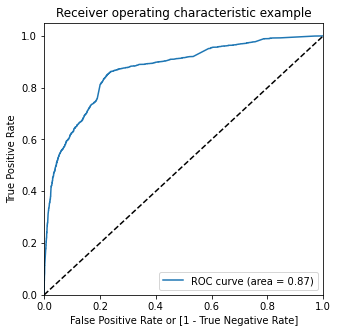

In [120]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conv_Prob)

### Area under ROC curve is 0.87

## 9. Finding the Optimal Cutoff

In [121]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conv_Prob,LeadID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.195219,302,0,1,1,0,0,0,0,0,0,0,0
1,0,0.007302,6087,0,1,0,0,0,0,0,0,0,0,0
2,0,0.260331,1033,0,1,1,1,0,0,0,0,0,0,0
3,0,0.220180,7656,0,1,1,1,0,0,0,0,0,0,0
4,1,0.773317,3241,1,1,1,1,1,1,1,1,1,0,0


In [122]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381581  1.000000  0.000000
0.1   0.1  0.552098  0.969522  0.294536
0.2   0.2  0.752790  0.885091  0.671156
0.3   0.3  0.802452  0.852142  0.771792
0.4   0.4  0.789879  0.753295  0.812452
0.5   0.5  0.795380  0.653213  0.883100
0.6   0.6  0.792551  0.571252  0.929098
0.7   0.7  0.784221  0.505766  0.956036
0.8   0.8  0.764576  0.427512  0.972554
0.9   0.9  0.707685  0.250000  0.990089


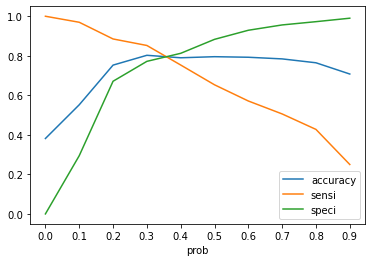

In [123]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0, 1, 0.1))
plt.show()

From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

In [124]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conv_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conv_Prob,LeadID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.195219,302,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.007302,6087,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.260331,1033,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.220180,7656,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.773317,3241,1,1,1,1,1,1,1,1,1,0,0,1


### Accuracy

In [125]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8043375766148043

### Confusion Matrix

In [126]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
print(confusion2)

[[3101  834]
 [ 411 2017]]


In [127]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

### Sensitivity

In [128]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8307248764415156

### Specificity

In [129]:
# Let us calculate specificity
TN / float(TN+FP)

0.7880559085133418

### Precision

In [130]:
# Let us calculate precision
TP/float(TP+FP)

0.7074710627849877

### Recall

In [131]:
# Let us calculate recall
TP/float(TP+FN)

0.8307248764415156

In [132]:
from sklearn.metrics import precision_score, recall_score

### Precision Score

In [133]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7751710654936461

### Recall Score

In [134]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.6532125205930808

### Precision and Recall Tradeoff

In [135]:
from sklearn.metrics import precision_recall_curve

In [136]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conv_Prob)

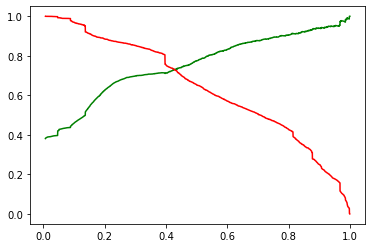

In [137]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## 10. Making Predictions on Test Set

In [138]:
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [139]:
col

Index(['Do Not Email', 'Website_Time_Spent', 'Lead Origin_Lead Add Form',
       'Occupation_Working Professional', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

In [140]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Website_Time_Spent,Lead Origin_Lead Add Form,Occupation_Working Professional,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
6906,0,1.919395,0,0,0,0,0,0,0,0,0
1873,0,-0.546142,0,0,0,0,0,0,1,0,0
771,0,-0.797465,0,0,0,0,0,1,0,0,0
4495,0,-0.623190,0,0,0,0,0,1,0,0,0
9061,0,2.392690,0,0,0,0,0,0,1,0,0


In [141]:
X_test_sm = sm.add_constant(X_test)

In [142]:
# Making Predictions on Test Set
y_test_pred = res.predict(X_test_sm)

In [143]:
y_test_pred[:10]

6906    0.897475
1873    0.117719
771     0.147229
4495    0.168572
9061    0.667317
4929    0.391948
2308    0.152985
1034    0.090693
9033    0.146381
7008    0.908294
dtype: float64

In [144]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [145]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [146]:
# Putting CustID to index
y_test_df['LeadID'] = y_test_df.index

In [147]:
# Remove index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [148]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [149]:
y_pred_final.head()

,Converted,LeadID,0
0,1,6906,0.897475
1,0,1873,0.117719
2,0,771,0.147229
3,0,4495,0.168572
4,1,9061,0.667317


In [150]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conv_Prob'})

In [151]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final.head()

,Converted,LeadID,Conv_Prob,final_predicted
0,1,6906,0.897475,1
1,0,1873,0.117719,0
2,0,771,0.147229,0
3,0,4495,0.168572,0
4,1,9061,0.667317,1


In [152]:
# Calculating Lead Score
y_pred_final['Lead_Score'] = y_pred_final.Conv_Prob.map( lambda x: round(x*100))
y_pred_final.head()

,Converted,LeadID,Conv_Prob,final_predicted,Lead_Score
0,1,6906,0.897475,1,90
1,0,1873,0.117719,0,12
2,0,771,0.147229,0,15
3,0,4495,0.168572,0,17
4,1,9061,0.667317,1,67


### Accuracy

In [153]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8008800880088008

### Confusion Matrix

In [154]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
print(confusion2)

[[1305  355]
 [ 188  879]]


In [155]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

### Sensitivity

In [156]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.823805060918463

### Specificity

In [157]:
# Let us calculate specificity
TN / float(TN+FP)

0.786144578313253

## 11. Conclusion

Training Set:
- Accuracy: 80.43%
- Sensitivity: 83.07%
- Specificity: 78.80%

Test Set:
- Accuracy: 80.08%
- Sensitivity: 82.38%
- Specificity: 78.61%

The ability of accurately predicting the conversion rate of any lead from the model is around 80%.
The probability of predicting a promising lead from the model is around 82%.
The model seems to predict the Lead Conversion Rate very well. It should be able to give the CEO confidence in making good calls based on this model.
    
    
    
Variables that mattered most in the lead conversion are -
- Website_Time_Spent with an coefficient of 0.9222
- Lead Origin_Lead Add Form with an coefficient of 3.8048
- Occupation_Working Professional with an coefficient of 2.6938

Other Important Variables
- Do Not Email
- Last Activity_Email Bounced
- Last Activity_Olark Chat Conversation
- Last Notable Activity_Email Link Clicked
- Last Notable Activity_Email Opened 
- Last Notable Activity_Modified
- Last Notable Activity_Olark Chat Conversation
- Last Notable Activity_Page Visited on Website

